In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Advance House Price Predictions.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.shape

(1460, 3)

In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

# now working on the GarageQual column

Text(0, 0.5, 'number of houses')

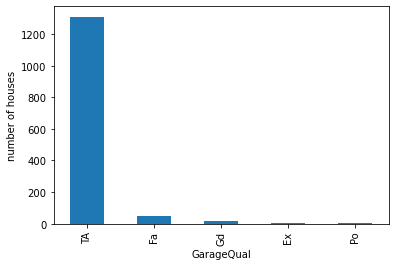

In [6]:
df['GarageQual'].value_counts().plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('number of houses')

In [7]:
df['GarageQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'GarageQual')

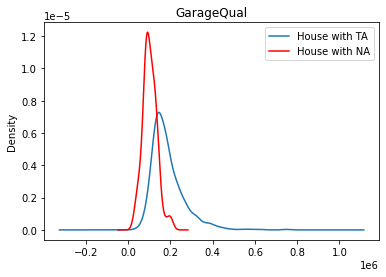

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,lables=ax.get_legend_handles_labels()
labels=['House with TA' , 'House with NA']

ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

In [9]:
df['GarageQual'].fillna('TA',inplace=True)

<AxesSubplot:>

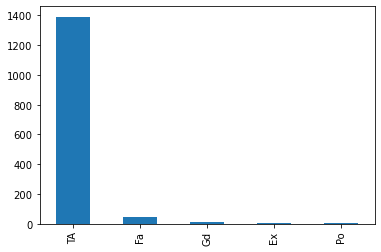

In [10]:
df['GarageQual'].value_counts().plot(kind='bar')

In [11]:
temp=df[df['GarageQual']=='TA']['SalePrice']

Text(0.5, 1.0, 'GarageQual')

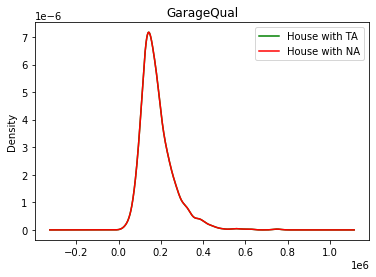

In [12]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax,color='green')
#distribution of the variable after imputation.

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,lables=ax.get_legend_handles_labels()
labels=['House with TA' , 'House with NA']

ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

# now working on the FireplaceQu

<AxesSubplot:>

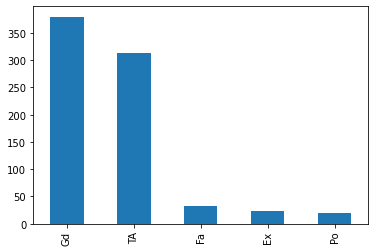

In [13]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [14]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

Text(0.5, 1.0, 'FireplaceQu')

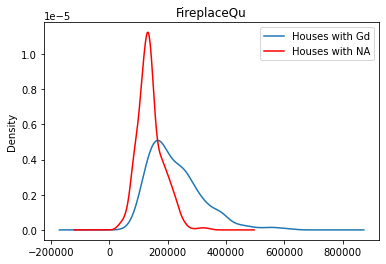

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,lables=ax.get_legend_handles_labels()
labels=['Houses with Gd' , 'Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [16]:
temp2=df[df['FireplaceQu']=='Gd']['SalePrice']

In [17]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<AxesSubplot:>

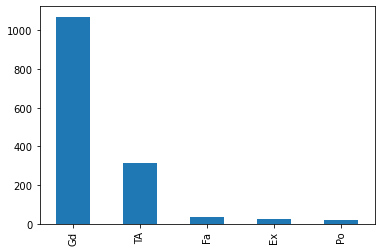

In [18]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

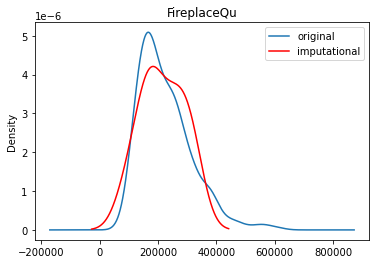

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp2.plot(kind='kde',ax=ax)
#distribution after imputation
df[df['GarageQual']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')


lines,lables=ax.get_legend_handles_labels()
labels=['original' , 'imputational']

ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)
imputer.statistics_

C:\Users\azhar\anacondamain\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['Gd', 'TA'], dtype=object)